In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [3]:
data = pd.read_csv(r"D:\analysis projects dataset\amazon_prime_titles.csv")

In [4]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [6]:
data.shape

(9668, 12)

In [7]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
data.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

# EDA

In [10]:
# handling missing values
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')

In [11]:
data['director'].isnull().sum()

0

In [12]:
# fill'country' with 'Unknown'
data['country'] = data['country'].fillna('Unknown')


In [13]:
data['country']

0               Canada
1                India
2        United States
3        United States
4       United Kingdom
             ...      
9663           Unknown
9664           Unknown
9665           Unknown
9666           Unknown
9667           Unknown
Name: country, Length: 9668, dtype: object

In [14]:
#Fill missing 'rating' with 'Unrated'
data['rating'] = data['rating'].fillna('Unrated')

In [15]:
data['rating']

0       Unrated
1           13+
2       Unrated
3       Unrated
4       Unrated
         ...   
9663         7+
9664        13+
9665          R
9666      TV-MA
9667          R
Name: rating, Length: 9668, dtype: object

In [16]:
# Drop rows where 'date_added' is missing 
data['date_added'] = data['date_added'].fillna('Unknown')

In [17]:
# Extract numeric values from 'duration' and  create new columns
def parse_duration(row):
    if 'Season' in row:  
        return int(row.split()[0]), 'Season(s)'
    elif 'min' in row:  
        return int(row.split()[0]), 'Minutes'
    else:
        return None, None

In [18]:
data[['duration_value', 'duration_unit']] = data['duration'].apply(parse_duration).apply(pd.Series)

In [19]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_value', 'duration_unit'],
      dtype='object')

In [20]:
# Converted to datetime.
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['date_added'] = data['date_added'].dt.strftime('%Y-%m-%d')
data['date_added'] = data['date_added'].fillna('Unknown')

In [21]:
data = data.drop_duplicates()

In [22]:
data.duplicated().sum()

0

In [23]:
text_columns = ['type', 'title', 'director', 'cast', 'country', 'listed_in', 'description']
for col in text_columns:
    data[col] = data[col].str.strip()

In [24]:
cleaned_data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         9668 non-null   object
 1   type            9668 non-null   object
 2   title           9668 non-null   object
 3   director        9668 non-null   object
 4   cast            9668 non-null   object
 5   country         9668 non-null   object
 6   date_added      9668 non-null   object
 7   release_year    9668 non-null   int64 
 8   rating          9668 non-null   object
 9   duration        9668 non-null   object
 10  listed_in       9668 non-null   object
 11  description     9668 non-null   object
 12  duration_value  9668 non-null   int64 
 13  duration_unit   9668 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


In [25]:
cleaned_data_head = data.head()

In [26]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,Unrated,113 min,"Comedy, Drama",A small fishing village must procure a local d...,113,Minutes
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,110,Minutes
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,Unrated,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,74,Minutes
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,Unrated,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",69,Minutes
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,Unrated,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,45,Minutes


# visualization

In [27]:
sns.set(style="whitegrid")

# 1.Content Distribution by Type




C:\Users\akkho\AppData\Local\Temp\ipykernel_13468\2510320699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='viridis')


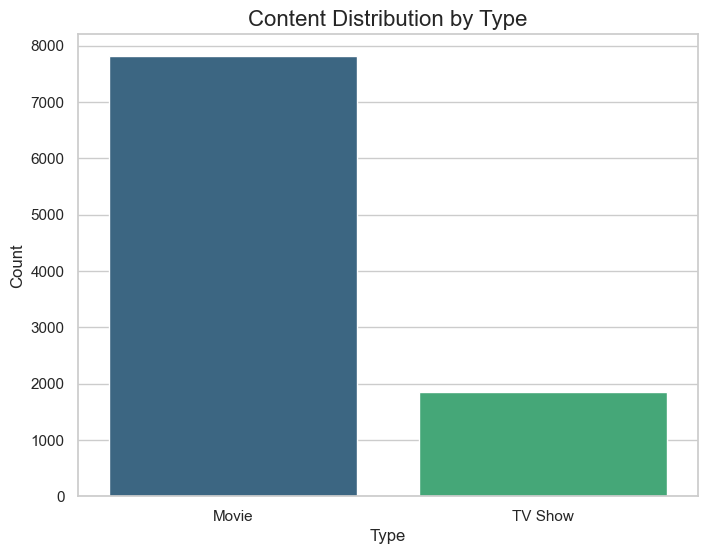

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type', palette='viridis')
plt.title('Content Distribution by Type', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 2. Top Countries by Content Production (Top 10)


C:\Users\akkho\AppData\Local\Temp\ipykernel_13468\413755510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')


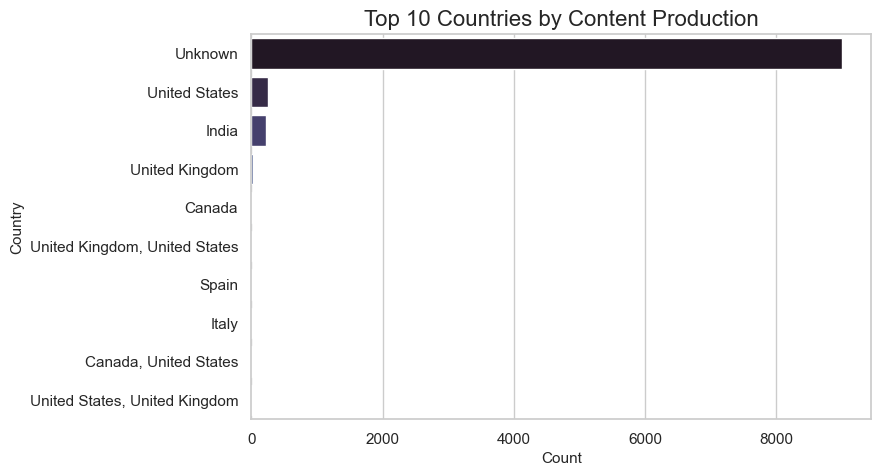

In [29]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')
plt.title('Top 10 Countries by Content Production', fontsize=16)
plt.xlabel('Count', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.show()

# Ratings Distribution

C:\Users\akkho\AppData\Local\Temp\ipykernel_13468\2520546772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index, palette='cubehelix')


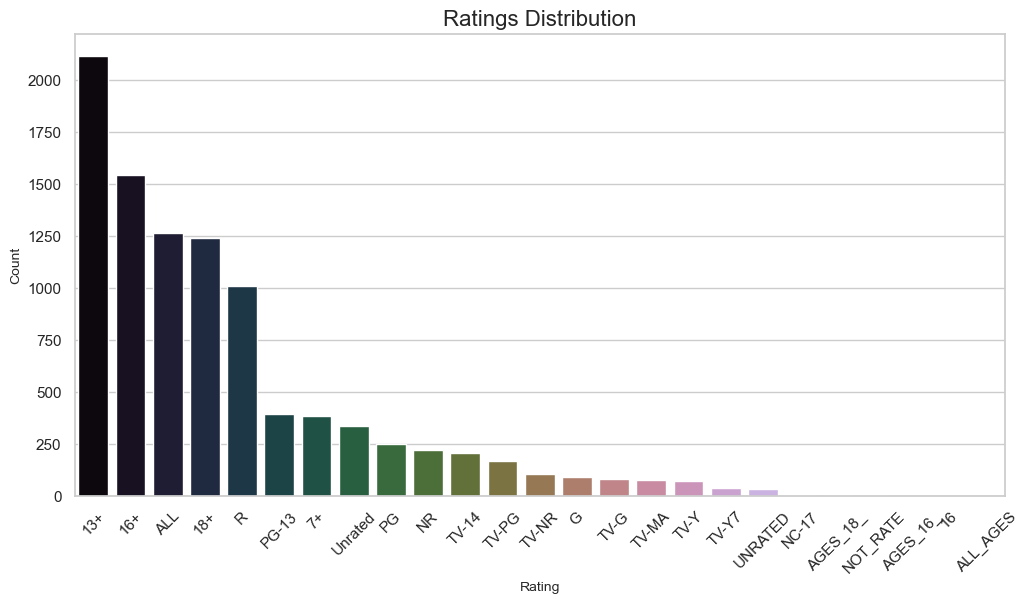

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index, palette='cubehelix')
plt.title('Ratings Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.show()

# Content Release Trend

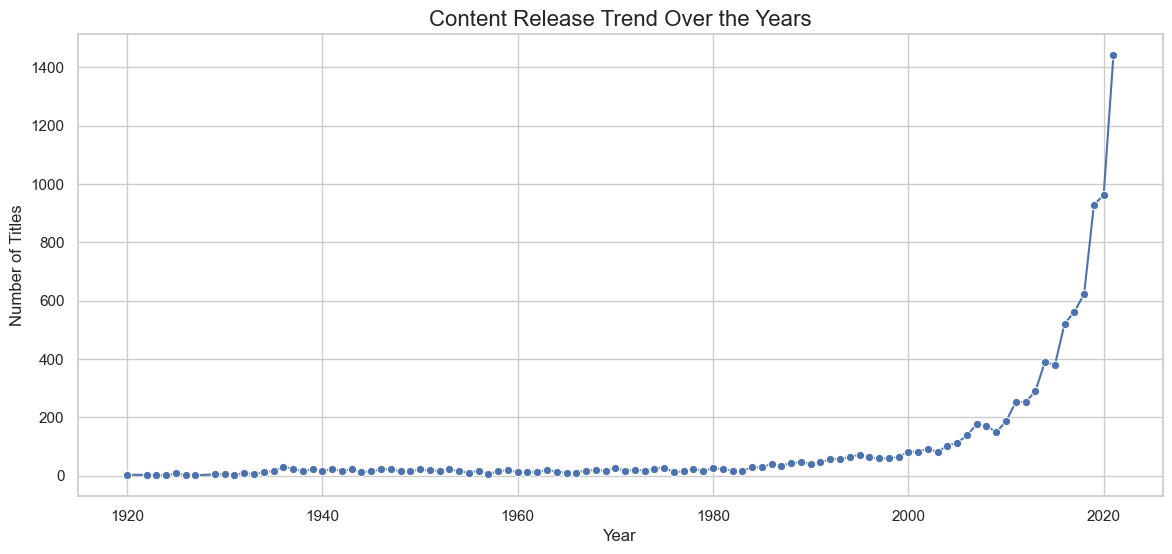

In [31]:
release_trend = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o', color='b')
plt.title('Content Release Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.show()

# Popular Genres


In [32]:
genres = " ".join(data['listed_in'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(genres)

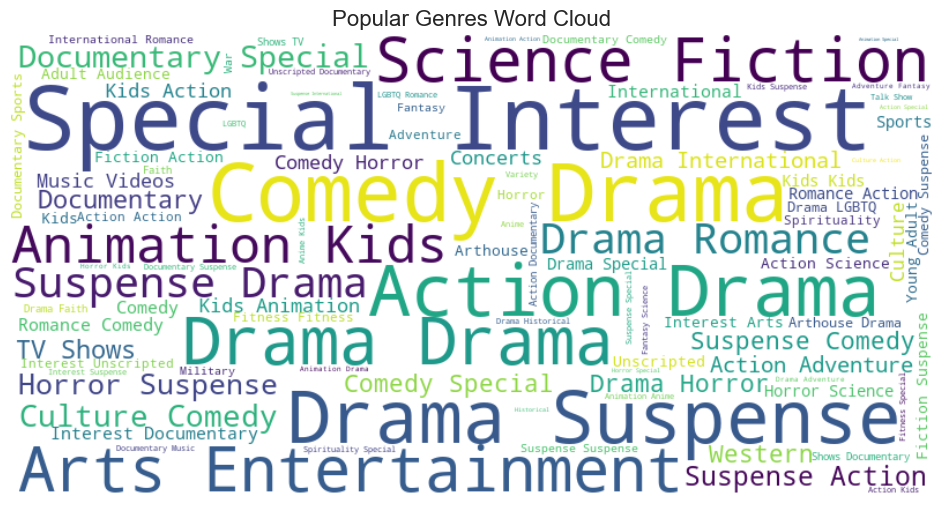

In [33]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Genres Word Cloud', fontsize=16)
plt.show()

# Duration Distribution

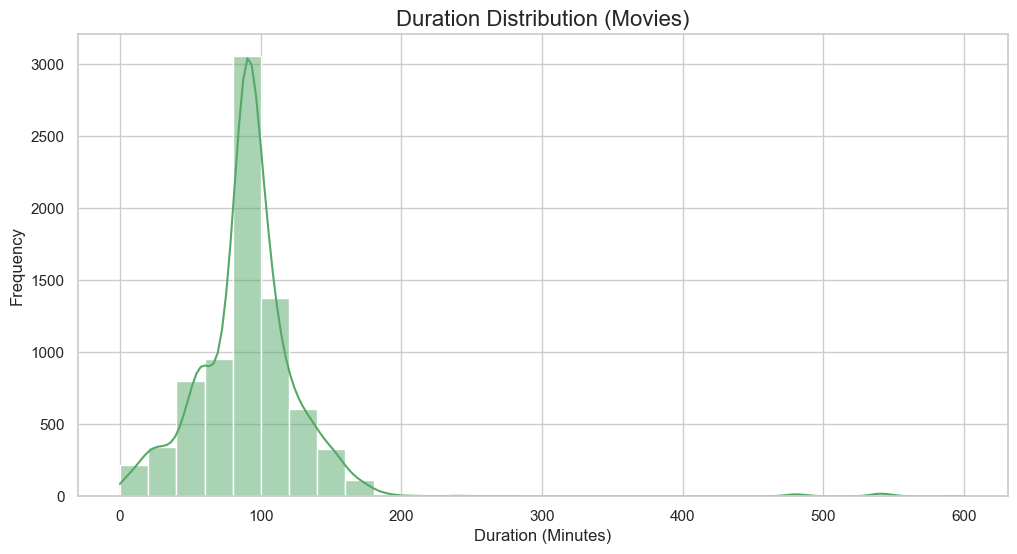

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['duration_unit'] == 'Minutes'], x='duration_value', bins=30, kde=True, color='g')
plt.title('Duration Distribution (Movies)', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()